# Rolling Planning
> Plannunghorizont je 3 Tage
> 
> Für 4 Planungstage

In [1]:
import json
import pandas as pd

In [2]:
# Basics
import utils.basics.presenter as show
import utils.basics.converter as convert

import utils.checker as check
import utils.rolling_planning as rp

In [3]:
import utils.schedule_solver__with_arrivals as ssv_a
import utils.reschedule.schedule_solver__arrival as rssv_a

In [4]:
from ProductionDaySimulation import ProductionDaySimulation

In [5]:
# Datei laden
with open("data/jobshop_instances.json", "r", encoding="utf-8") as f:
    jobshop_instances = json.load(f)

instance =  jobshop_instances["instance ft10"]
df_instance = convert.jssp_dict_to_df(instance)
df_instance

,Job,Operation,Machine,Processing Time
0,job 0,0,M0,29
1,job 0,1,M1,78
2,job 0,2,M2,9
3,job 0,3,M3,36
4,job 0,4,M4,49
...,...,...,...,...
95,job 9,5,M9,76
96,job 9,6,M5,47
97,job 9,7,M3,52
98,job 9,8,M4,90


In [6]:
df_jssp, df_times = rp.init_jobs_with_arrivals(df_instance, 6,  u_b_mmax= 0.9)
df_jssp

,Job,Operation,Machine,Processing Time
0,Job_000,0,M0,29
1,Job_000,1,M1,78
2,Job_000,2,M2,9
3,Job_000,3,M3,36
4,Job_000,4,M4,49
...,...,...,...,...
1135,Job_113,5,M9,76
1136,Job_113,6,M5,47
1137,Job_113,7,M3,52
1138,Job_113,8,M4,90


In [7]:
df_times

,Job,Arrival
0,Job_000,0.00
1,Job_001,88.05
2,Job_002,152.78
3,Job_003,207.97
4,Job_004,246.61
...,...,...
109,Job_109,8390.89
110,Job_110,8397.28
111,Job_111,8398.72
112,Job_112,8524.04


In [8]:
solver_limit = 60*60*2 # jeweils 2h

## I) Day 0

In [9]:
day_start = 0
day_end = day_start + 1440
planning_end = day_start + 3*1440

### a) Filtern

In [10]:
time_filter = (df_times["Arrival"] >= day_start) & (df_times["Arrival"] < planning_end)

df_times_filtered = df_times[time_filter]
df_times_filtered

,Job,Arrival
0,Job_000,0.00
1,Job_001,88.05
2,Job_002,152.78
3,Job_003,207.97
4,Job_004,246.61
5,Job_005,319.39
6,Job_006,359.74
7,Job_007,515.63
8,Job_008,748.04
9,Job_009,781.95


In [11]:
df_jssp_filtered = df_jssp[df_jssp["Job"].isin(df_times_filtered["Job"])]
df_jssp_filtered

,Job,Operation,Machine,Processing Time
0,Job_000,0,M0,29
1,Job_000,1,M1,78
2,Job_000,2,M2,9
3,Job_000,3,M3,36
4,Job_000,4,M4,49
...,...,...,...,...
565,Job_056,5,M9,76
566,Job_056,6,M5,47
567,Job_056,7,M3,52
568,Job_056,8,M4,90


### b) Scheduling

In [12]:
df_plan, _ = ssv_a.solve_jssp_weighted_individual_flowtime(df_jssp_filtered, df_times_filtered, 
                                                  solver_time_limit = solver_limit)
df_plan

Running HiGHS 1.10.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
Set option time_limit to 7200
Set option solution_file to "/var/folders/88/5n59t5yx3095jhz9lldbm0kr0000gn/T/270be264a2eb4498868ca0dfcca8e2bc-pulp.sol"
Set option log_file to "/var/folders/88/5n59t5yx3095jhz9lldbm0kr0000gn/T/270be264a2eb4498868ca0dfcca8e2bc-pulp.HiGHS_log"
Set option write_solution_to_file to true
Number of BV entries in BOUNDS section is 15960
MIP  270be264a2eb4498868ca0dfcca8e2bc-pulp has 32547 rows; 16587 cols; 96957 nonzeros; 15960 integer variables (15960 binary)
Coefficient ranges:
  Matrix [1e+00, 1e+06]
  Cost   [2e-04, 1e+00]
  Bound  [1e+00, 1e+00]
  RHS    [2e+00, 1e+06]
Presolving model
32433 rows, 16530 cols, 96786 nonzeros  0s
16473 rows, 16530 cols, 48906 nonzeros  0s
16473 rows, 16530 cols, 48906 nonzeros  0s

Solving MIP model with:
   16473 rows
   16530 cols (15960 binary, 0 integer, 0 implied int., 570 continuous)
   48906 nonzeros

Src: B => Branching; C => Centra

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_000,0,0.00,M0,0.00,29,29.00,29.00
1,Job_000,1,0.00,M1,29.00,78,107.00,107.00
2,Job_000,2,0.00,M2,107.00,9,116.00,116.00
3,Job_000,3,0.00,M3,116.00,36,152.00,152.00
4,Job_000,4,0.00,M4,152.00,49,201.00,201.00
...,...,...,...,...,...,...,...,...
565,Job_056,5,4309.61,M9,6068.39,76,1834.78,6144.39
566,Job_056,6,4309.61,M5,6268.39,47,2005.78,6315.39
567,Job_056,7,4309.61,M3,6315.39,52,2057.78,6367.39
568,Job_056,8,4309.61,M4,6367.39,90,2147.78,6457.39


In [13]:
df_plan.to_csv("data/04a_schedule_00.csv", index = False)

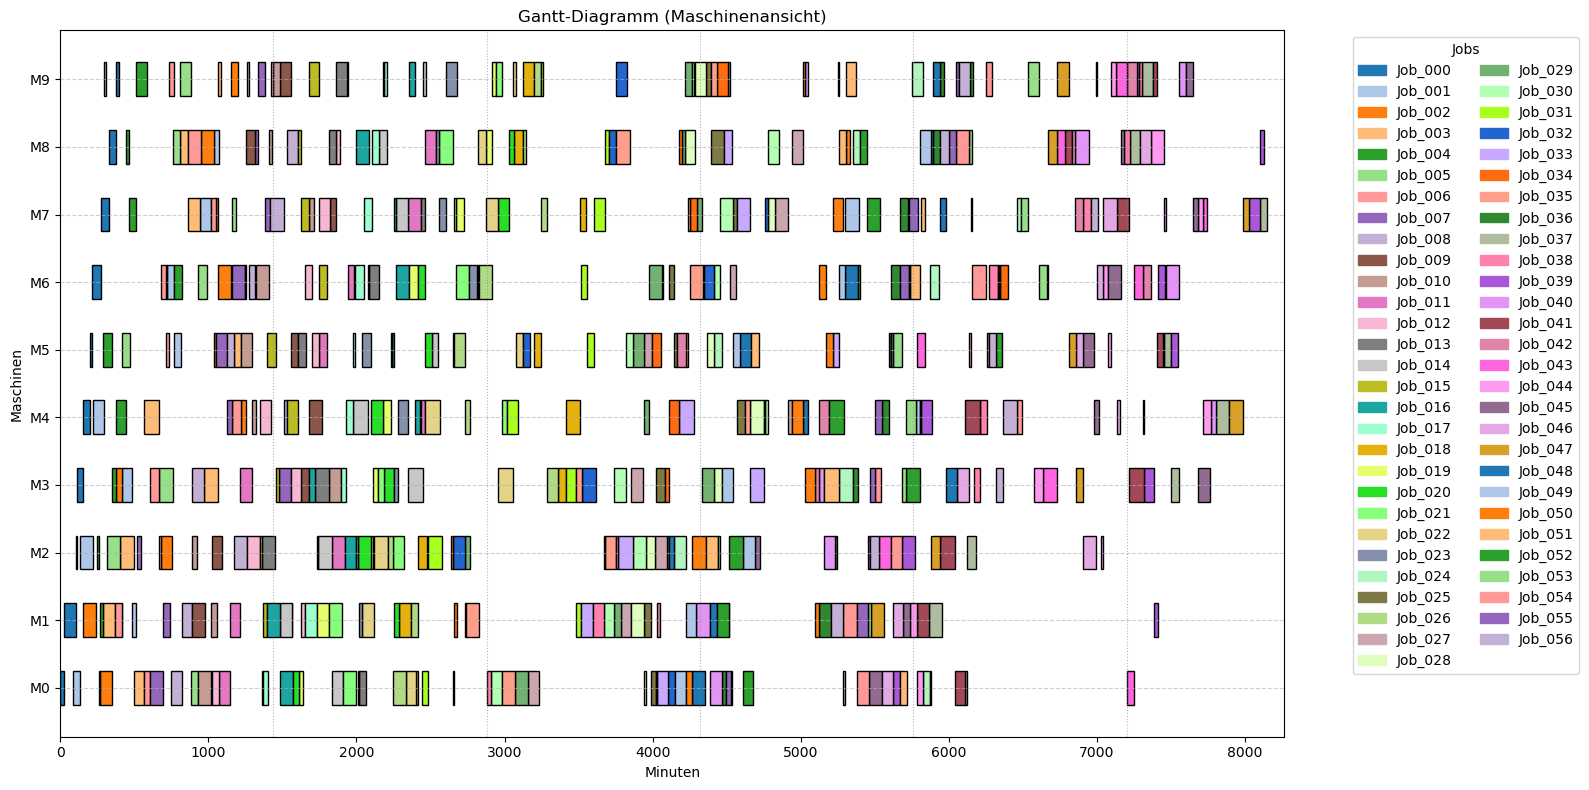

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [14]:
show.plot_gantt_machines(df_plan)
check.check_all_constraints(df_plan)

### c) Simulation

In [15]:
# Auf einen Tag filtern
filt = (df_plan["Start"] >=  day_start) & (df_plan["Start"] < day_end)
df_plan_single_day = df_plan[filt]
df_plan_single_day

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_000,0,0.00,M0,0.00,29,29.00,29.00
1,Job_000,1,0.00,M1,29.00,78,107.00,107.00
2,Job_000,2,0.00,M2,107.00,9,116.00,116.00
3,Job_000,3,0.00,M3,116.00,36,152.00,152.00
4,Job_000,4,0.00,M4,152.00,49,201.00,201.00
...,...,...,...,...,...,...,...,...
151,Job_015,1,1197.28,M0,1365.39,6,174.11,1371.39
152,Job_015,2,1197.28,M1,1371.39,22,196.11,1393.39
153,Job_015,3,1197.28,M5,1393.39,61,257.11,1454.39
160,Job_016,0,1198.72,M1,1393.39,91,285.67,1484.39


In [16]:
simulation = ProductionDaySimulation(df_plan_single_day, vc=0.35)
df_execution, df_undone = simulation.run(start_time = day_start, end_time=day_end)

[00:00:00] Job_000 started on M0
[00:13:11] Job_000 finished on M0 (after 13 minutes 12 seconds)
[00:29:00] Job_000 started on M1
[01:28:02] Job_001 started on M0
[01:34:55] Job_000 finished on M1 (after 65 minutes 56 seconds)
[01:47:00] Job_000 started on M2
[01:53:25] Job_000 finished on M2 (after 06 minutes 25 seconds)
[01:56:00] Job_000 started on M3
[02:03:22] Job_001 finished on M0 (after 35 minutes 20 seconds)
[02:11:03] Job_001 started on M2
[02:32:46] Job_002 started on M1
[02:45:29] Job_000 finished on M3 (after 49 minutes 29 seconds)
[02:45:29] Job_000 started on M4
[03:28:04] Job_000 finished on M4 (after 42 minutes 35 seconds)
[03:28:04] Job_000 started on M5
[03:42:21] Job_000 finished on M5 (after 14 minutes 17 seconds)
[03:42:21] Job_000 started on M6
[04:10:01] Job_002 finished on M1 (after 97 minutes 14 seconds)
[04:24:55] Job_001 finished on M2 (after 133 minutes 52 seconds)
[04:24:55] Job_004 started on M2
[04:24:55] Job_001 started on M4
[04:26:36] Job_002 started 

In [17]:
df_execution

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
0,Job_000,0,0.00,M0,0.00,13.20,13.20,13.20
1,Job_000,1,0.00,M1,29.00,65.93,94.93,94.93
2,Job_000,2,0.00,M2,107.00,6.42,113.42,113.42
3,Job_000,3,0.00,M3,116.00,49.49,165.49,165.49
4,Job_000,4,0.00,M4,165.49,42.58,208.07,208.07
...,...,...,...,...,...,...,...,...
104,Job_013,0,1185.73,M2,1373.54,95.71,283.52,1469.25
105,Job_015,0,1197.28,M2,1354.23,19.31,176.26,1373.54
106,Job_015,1,1197.28,M0,1401.23,11.00,214.95,1412.23
107,Job_016,0,1198.72,M1,1393.39,112.54,307.21,1505.93


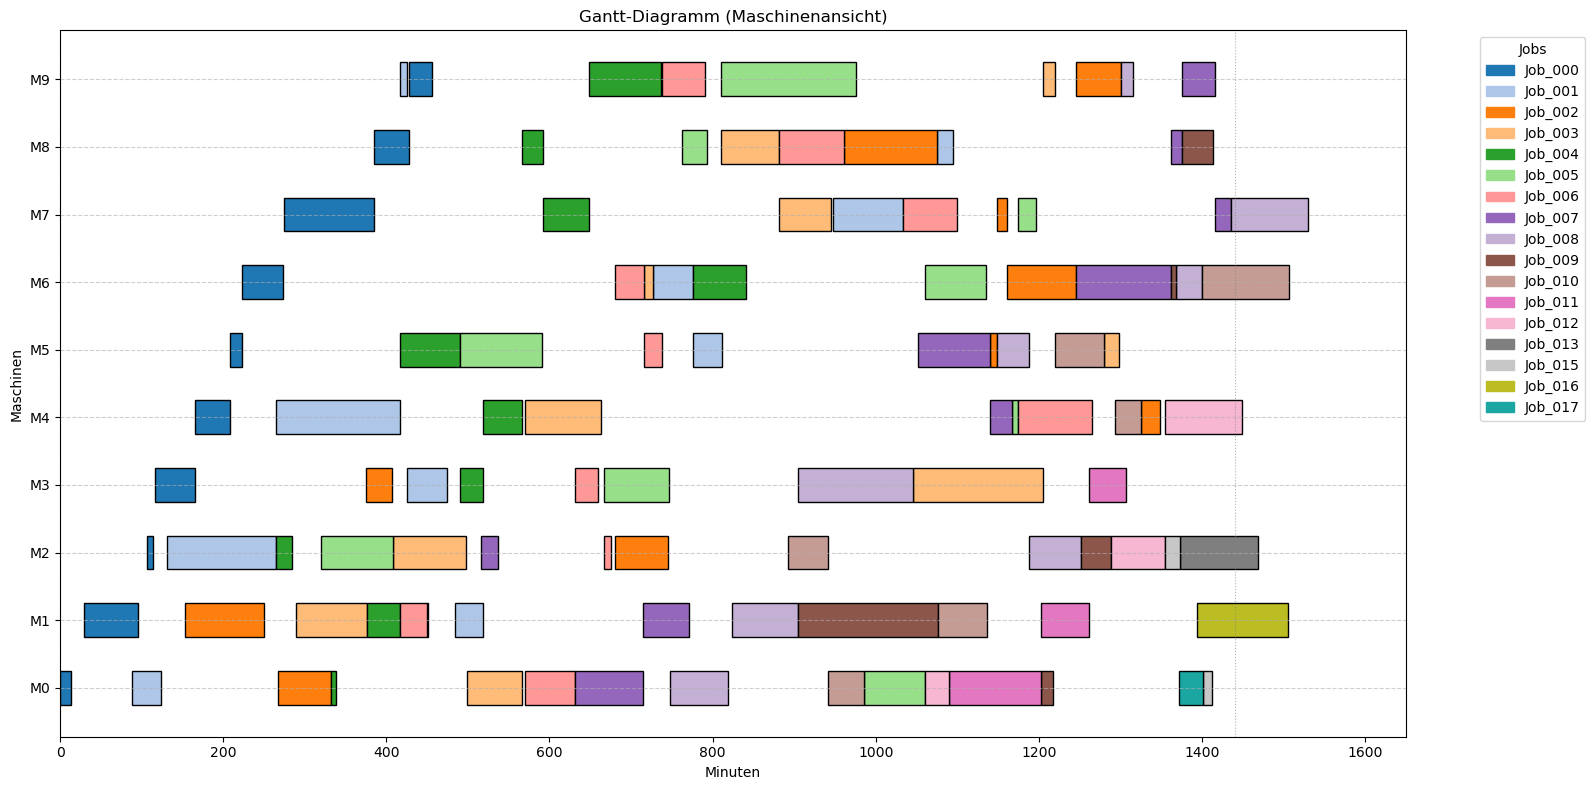

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [18]:
show.plot_gantt_machines(df_execution, duration_column = "Simulated Processing Time")
check.check_all_constraints(df_execution)

In [19]:
df_undone

,Job,Operation,Arrival,Machine,Planned Start,Processing Time
3,Job_015,2,1197.28,M1,1371.39,22
4,Job_015,3,1197.28,M5,1393.39,61
0,Job_010,6,891.94,M8,1413.39,19
2,Job_012,3,1003.56,M9,1426.39,11
1,Job_010,7,891.94,M9,1437.39,48


In [20]:
### d) 

## II) Day 1

In [21]:
day_start = 1440
day_end = day_start + 1440
planning_end = day_start + 3*1440

In [22]:
# Operations, die in diesem Tag hineinlaufen (zuvor begonnen)
df_execution_important = df_execution[df_execution["End"] >= day_start ]
df_execution_important

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
86,Job_008,7,748.04,M7,1435.64,94.64,782.24,1530.28
97,Job_010,5,891.94,M6,1399.70,107.45,615.21,1507.15
103,Job_012,2,1003.56,M4,1354.23,94.44,445.11,1448.67
104,Job_013,0,1185.73,M2,1373.54,95.71,283.52,1469.25
107,Job_016,0,1198.72,M1,1393.39,112.54,307.21,1505.93


### a) Filtern

In [23]:
time_filter = (df_times["Arrival"] >= day_start) & (df_times["Arrival"] < planning_end)

df_times_filtered = df_times[time_filter]
df_times_filtered

,Job,Arrival
19,Job_019,1440.00
20,Job_020,1528.05
21,Job_021,1592.78
22,Job_022,1647.97
23,Job_023,1686.61
24,Job_024,1759.39
25,Job_025,1799.74
26,Job_026,1955.63
27,Job_027,2188.04
28,Job_028,2221.95


In [24]:
df_jssp_filtered = df_jssp[df_jssp["Job"].isin(df_times_filtered["Job"])]
df_jssp_filtered

,Job,Operation,Machine,Processing Time
190,Job_019,0,M0,29
191,Job_019,1,M1,78
192,Job_019,2,M2,9
193,Job_019,3,M3,36
194,Job_019,4,M4,49
...,...,...,...,...
755,Job_075,5,M9,76
756,Job_075,6,M5,47
757,Job_075,7,M3,52
758,Job_075,8,M4,90


### a2) eventuelle "Executed" Operations entfernen
> falls vorgezogen

In [25]:
# Erzeuge eine Kombination aus Job + Operation für den Vergleich
jssp_keys = df_jssp_filtered[['Job', 'Operation']]
execution_keys = df_execution[['Job', 'Operation']]

# Führe den Anti-Join durch (nur die Zeilen, die NICHT in df_execution sind)
merged = df_jssp_filtered.merge(execution_keys.drop_duplicates(), 
                                on=['Job', 'Operation'], 
                                how='left', 
                                indicator=True)

# Behalte nur die Zeilen, die **nicht** gematcht wurden
df_jssp_todo = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])
df_jssp_todo

,Job,Operation,Machine,Processing Time
0,Job_019,0,M0,29
1,Job_019,1,M1,78
2,Job_019,2,M2,9
3,Job_019,3,M3,36
4,Job_019,4,M4,49
...,...,...,...,...
565,Job_075,5,M9,76
566,Job_075,6,M5,47
567,Job_075,7,M3,52
568,Job_075,8,M4,90


### a3) weitere Operations anhängen
> nicht angefangene

In [26]:
# Nur die relevanten Spalten aus df_undone auswählen
df_undone_relevant_cols = df_undone[['Job', 'Operation', 'Machine', 'Processing Time']].copy()

# Sicherstellen, dass die Datentypen übereinstimmen
df_undone_relevant_cols['Job'] = df_undone_relevant_cols['Job'].astype(str)
df_jssp_todo['Job'] = df_jssp_todo['Job'].astype(str)

# Nun df_todo und df_undone_relevant zusammenführen
df_jssp_todo_extended = pd.concat([df_undone_relevant_cols, df_jssp_todo], ignore_index=True)

# Optional: Doppelte Zeilen (Job+Operation) entfernen, falls nötig
df_jssp_todo_extended.drop_duplicates(subset=['Job', 'Operation'], inplace=True)

# Index zurücksetzen
df_jssp_todo_extended.reset_index(drop=True, inplace=True)
df_jssp_todo_extended

,Job,Operation,Machine,Processing Time
0,Job_015,2,M1,22
1,Job_015,3,M5,61
2,Job_010,6,M8,19
3,Job_012,3,M9,11
4,Job_010,7,M9,48
...,...,...,...,...
570,Job_075,5,M9,76
571,Job_075,6,M5,47
572,Job_075,7,M3,52
573,Job_075,8,M4,90


### a4) Zeiten erneut filtern (anhand der Operations)

In [27]:
df_times_filtered = df_times[df_times["Job"].isin(df_jssp_todo_extended["Job"])]
df_times_filtered 

,Job,Arrival
10,Job_010,891.94
12,Job_012,1003.56
15,Job_015,1197.28
19,Job_019,1440.00
20,Job_020,1528.05
21,Job_021,1592.78
22,Job_022,1647.97
23,Job_023,1686.61
24,Job_024,1759.39
25,Job_025,1799.74


In [28]:
# df_undone Arroval extrahieren und an df_times_filtered anhängen
# df_undone Job, Operation, Machine an df_jssp_filtered anhängen

### b) Rescheduling

In [29]:
df_reschedule = rssv_a.solve_jssp_weighted_individual_flowtime_with_fixed_ops(
    df_jssp_todo_extended, df_times_filtered, df_execution_important, 
    solver_time_limit = solver_limit,
    reschedule_start = day_start
)
df_reschedule

Running HiGHS 1.10.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
Set option time_limit to 7200
Set option solution_file to "/var/folders/88/5n59t5yx3095jhz9lldbm0kr0000gn/T/e790b524e0584765a2a7660c118a922c-pulp.sol"
Set option log_file to "/var/folders/88/5n59t5yx3095jhz9lldbm0kr0000gn/T/e790b524e0584765a2a7660c118a922c-pulp.HiGHS_log"
Set option write_solution_to_file to true
Number of BV entries in BOUNDS section is 16532
MIP  e790b524e0584765a2a7660c118a922c-pulp has 33699 rows; 17167 cols; 99830 nonzeros; 16532 integer variables (16532 binary)
Coefficient ranges:
  Matrix [1e+00, 1e+05]
  Cost   [2e-04, 1e-03]
  Bound  [1e+00, 1e+00]
  RHS    [2e+00, 1e+05]
Presolving model
33511 rows, 17038 cols, 99444 nonzeros  0s
20552 rows, 17038 cols, 60707 nonzeros  0s
20442 rows, 16983 cols, 60487 nonzeros  0s

Solving MIP model with:
   20442 rows
   16983 cols (16408 binary, 0 integer, 0 implied int., 575 continuous)
   60487 nonzeros

Src: B => Branching; C => Centra

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_010,6,891.94,M8,1507.15,19.0,634.21,1526.15
1,Job_010,7,891.94,M9,1526.15,48.0,682.21,1574.15
2,Job_012,3,1003.56,M9,1448.67,11.0,456.11,1459.67
3,Job_015,2,1197.28,M1,1505.93,22.0,330.65,1527.93
4,Job_015,3,1197.28,M5,1527.93,61.0,391.65,1588.93
...,...,...,...,...,...,...,...,...
570,Job_075,5,5749.61,M9,7705.39,76.0,2031.78,7781.39
571,Job_075,6,5749.61,M5,7781.39,47.0,2078.78,7828.39
572,Job_075,7,5749.61,M3,7828.39,52.0,2130.78,7880.39
573,Job_075,8,5749.61,M4,7980.39,90.0,2320.78,8070.39


In [30]:
df_reschedule.to_csv("data/04a_schedule_01.csv", index = False)

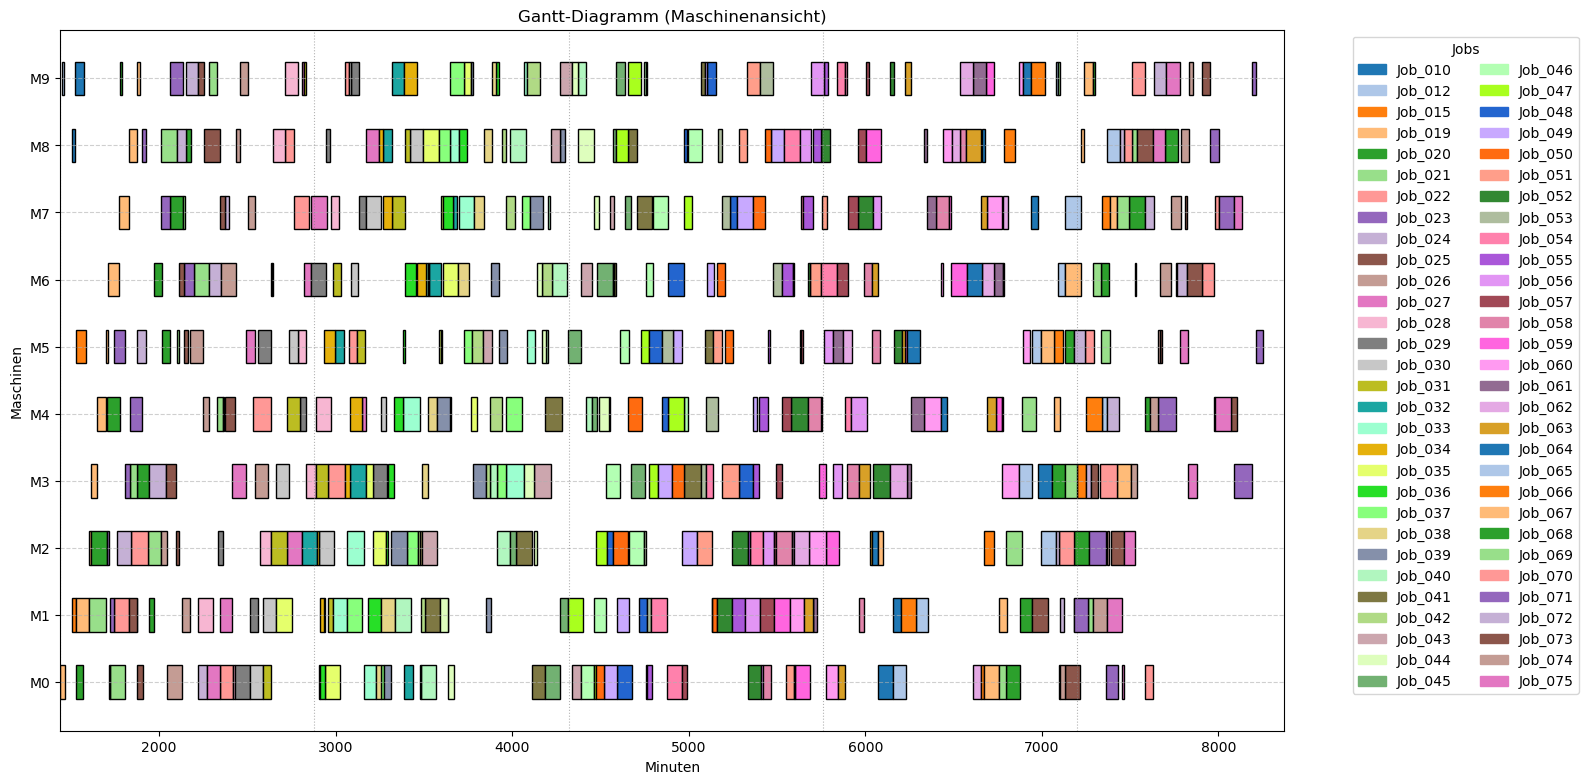

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [31]:
show.plot_gantt_machines(df_reschedule)
check.check_all_constraints(df_reschedule)

### c) Simulation

In [32]:
# Auf einen Tag filtern
filt = (df_reschedule["Start"] >=  day_start) & (df_reschedule["Start"] < day_end)
df_plan_single_day = df_reschedule[filt]
df_plan_single_day

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_010,6,891.94,M8,1507.15,19.0,634.21,1526.15
1,Job_010,7,891.94,M9,1526.15,48.0,682.21,1574.15
2,Job_012,3,1003.56,M9,1448.67,11.0,456.11,1459.67
3,Job_015,2,1197.28,M1,1505.93,22.0,330.65,1527.93
4,Job_015,3,1197.28,M5,1527.93,61.0,391.65,1588.93
...,...,...,...,...,...,...,...,...
126,Job_031,1,2443.56,M2,2634.39,90.0,280.83,2724.39
127,Job_031,2,2443.56,M4,2724.39,75.0,355.83,2799.39
128,Job_031,3,2443.56,M9,2820.39,11.0,387.83,2831.39
135,Job_032,0,2625.73,M2,2809.39,84.0,267.66,2893.39


In [33]:
simulation = ProductionDaySimulation(df_plan_single_day, vc=0.35)
df_execution, df_undone = simulation.run(start_time = day_start, end_time=day_end)

[24:00:00] Job_019 started on M0
[24:08:40] Job_012 started on M9
[24:15:46] Job_012 finished on M9 (after 07 minutes 06 seconds)
[24:16:06] Job_019 finished on M0 (after 16 minutes 07 seconds)
[25:05:55] Job_015 started on M1
[25:07:09] Job_010 started on M8
[25:19:32] Job_015 finished on M1 (after 13 minutes 37 seconds)
[25:27:55] Job_019 started on M1
[25:27:55] Job_015 started on M5
[25:28:02] Job_020 started on M0
[25:37:40] Job_010 finished on M8 (after 30 minutes 32 seconds)
[25:37:40] Job_010 started on M9
[26:10:20] Job_020 finished on M0 (after 42 minutes 17 seconds)
[26:26:59] Job_010 finished on M9 (after 49 minutes 19 seconds)
[26:30:04] Job_015 finished on M5 (after 62 minutes 08 seconds)
[26:36:45] Job_019 finished on M1 (after 68 minutes 50 seconds)
[26:45:55] Job_021 started on M1
[26:45:55] Job_019 started on M2
[26:57:05] Job_019 finished on M2 (after 11 minutes 10 seconds)
[26:57:05] Job_020 started on M2
[26:57:05] Job_019 started on M3
[27:51:32] Job_019 finished 

In [34]:
df_execution

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
0,Job_010,6,891.94,M8,1507.15,30.53,645.74,1537.68
1,Job_010,7,891.94,M9,1537.68,49.31,695.05,1586.99
2,Job_012,3,1003.56,M9,1448.67,7.10,452.21,1455.77
3,Job_015,2,1197.28,M1,1505.93,13.61,322.26,1519.54
4,Job_015,3,1197.28,M5,1527.93,62.14,392.79,1590.07
...,...,...,...,...,...,...,...,...
107,Job_031,1,2443.56,M2,2675.72,66.29,298.45,2742.01
108,Job_031,2,2443.56,M4,2742.01,82.99,381.44,2825.00
109,Job_031,3,2443.56,M9,2825.00,8.58,390.02,2833.58
110,Job_032,0,2625.73,M2,2842.39,111.36,328.02,2953.75


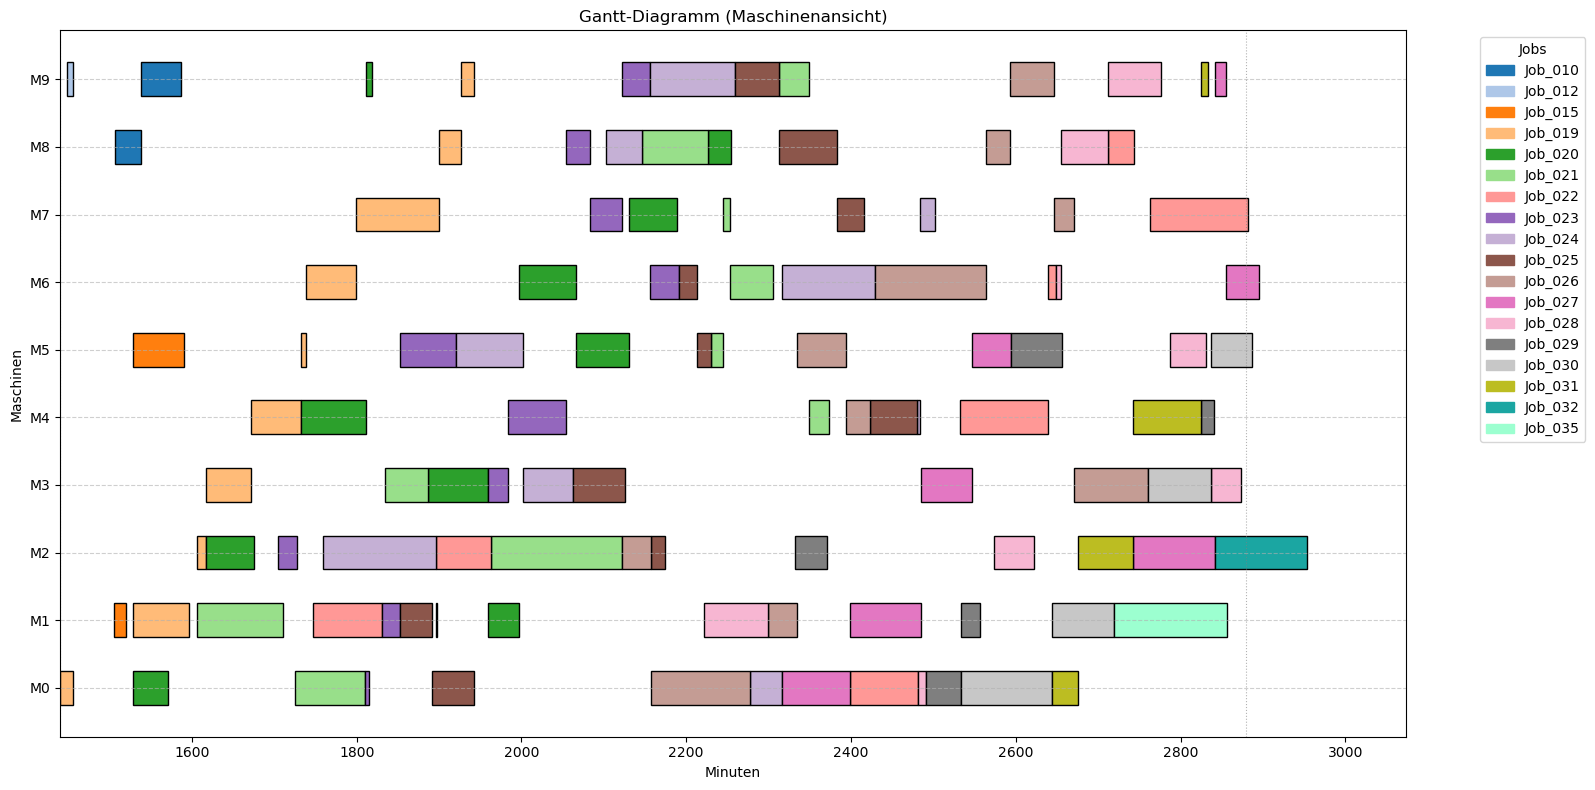

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [35]:
show.plot_gantt_machines(df_execution, duration_column = "Simulated Processing Time")
check.check_all_constraints(df_execution)

In [36]:
df_undone

,Job,Operation,Arrival,Machine,Planned Start,Processing Time
0,Job_027,7,2188.04,M7,2860.39,89.0
1,Job_029,5,2331.94,M6,2860.39,88.0


## III) Day 2

In [37]:
day_start = 2880
day_end = day_start + 1440
planning_end = day_start + 3*1440

In [38]:
def get_operations_running_into_day(df_execution: pd.DataFrame, day_start: float) -> pd.DataFrame:
    """
    Gibt alle Operationen zurück, deren Endzeit in oder nach dem gegebenen Tagesstart liegt.
    D.h. alle Operationen, die noch aktiv sind oder über den Tageswechsel hinauslaufen.

    Parameter:
    - df_execution: DataFrame mit mindestens der Spalte 'End'.
    - day_start: Startzeit des betrachteten Tages (z.B. 1440.0 für Tag 2 bei Minutenmodellierung).

    Rückgabe:
    - DataFrame mit relevanten Operationen.
    """
    return df_execution[df_execution["End"] >= day_start].copy()

In [39]:
df_execution_important = get_operations_running_into_day(df_execution, day_start)
df_execution_important 

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
41,Job_022,6,1647.97,M7,2763.39,118.98,1234.40,2882.37
88,Job_027,6,2188.04,M6,2855.64,39.47,707.07,2895.11
105,Job_030,3,2384.71,M5,2837.47,48.82,501.58,2886.29
110,Job_032,0,2625.73,M2,2842.39,111.36,328.02,2953.75


### a) Filtern

In [40]:
def filter_jobs_by_arrival_window(
    df_times: pd.DataFrame,
    df_jssp: pd.DataFrame,
    day_start: float,
    planning_end: float,
    arrival_column: str = "Arrival"
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Filtert Jobs anhand eines Zeitfensters (z.B. Tagesabschnitt) und gibt die passenden
    Datensätze für Ankunftszeiten und JSSP zurück.

    Parameter:
    - df_times: DataFrame mit ['Job', arrival_column], z.B. Ankunftszeiten.
    - df_jssp: DataFrame mit ['Job', 'Operation', 'Machine', 'Processing Time'].
    - day_start: Startzeit des Zeitfensters.
    - planning_end: Endzeit des Zeitfensters.
    - arrival_column: Name der Spalte mit den Ankunftszeiten (Standard: 'Arrival').

    Rückgabe:
    - df_times_filtered: Nur Jobs, deren Arrival im Fenster liegt.
    - df_jssp_filtered: Entsprechende Operationen aus df_jssp.
    """
    time_filter = (df_times[arrival_column] >= day_start) & (df_times[arrival_column] < planning_end)
    df_times_filtered = df_times[time_filter].copy()
    relevant_jobs = df_times_filtered["Job"].unique()
    df_jssp_filtered = df_jssp[df_jssp["Job"].isin(relevant_jobs)].copy()
    return df_jssp_filtered, df_times_filtered

In [41]:
df_jssp_filtered, df_times_filtered = filter_jobs_by_arrival_window(df_times, df_jssp, day_start, planning_end)
df_jssp_filtered

,Job,Operation,Machine,Processing Time
380,Job_038,0,M0,29
381,Job_038,1,M1,78
382,Job_038,2,M2,9
383,Job_038,3,M3,36
384,Job_038,4,M4,49
...,...,...,...,...
945,Job_094,5,M9,76
946,Job_094,6,M5,47
947,Job_094,7,M3,52
948,Job_094,8,M4,90


In [42]:
df_times_filtered 

,Job,Arrival
38,Job_038,2880.00
39,Job_039,2968.05
40,Job_040,3032.78
41,Job_041,3087.97
42,Job_042,3126.61
43,Job_043,3199.39
44,Job_044,3239.74
45,Job_045,3395.63
46,Job_046,3628.04
47,Job_047,3661.95


### a2) eventuelle "Executed" Operations entfernen
> falls vorgezogen

In [43]:
import pandas as pd

def get_unexecuted_operations(
    df_jssp_filtered: pd.DataFrame,
    df_execution: pd.DataFrame
) -> pd.DataFrame:
    """
    Gibt alle Operationen aus df_jssp_filtered zurück, die noch nicht in df_execution enthalten sind.
    Nutzt einen Anti-Join auf ['Job', 'Operation'].

    Parameter:
    - df_jssp_filtered: DataFrame mit geplanten Operationen ['Job', 'Operation', ...].
    - df_execution: DataFrame mit ausgeführten Operationen ['Job', 'Operation', ...].

    Rückgabe:
    - df_jssp_todo: DataFrame mit noch auszuführenden Operationen.
    """
    jssp_keys = df_jssp_filtered[['Job', 'Operation']]
    execution_keys = df_execution[['Job', 'Operation']]

    merged = df_jssp_filtered.merge(
        execution_keys.drop_duplicates(),
        on=['Job', 'Operation'],
        how='left',
        indicator=True
    )

    df_jssp_todo = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])
    return df_jssp_todo


In [44]:
df_jssp_todo = get_unexecuted_operations(df_jssp_filtered, df_execution)
df_jssp_todo

,Job,Operation,Machine,Processing Time
0,Job_038,0,M0,29
1,Job_038,1,M1,78
2,Job_038,2,M2,9
3,Job_038,3,M3,36
4,Job_038,4,M4,49
...,...,...,...,...
565,Job_094,5,M9,76
566,Job_094,6,M5,47
567,Job_094,7,M3,52
568,Job_094,8,M4,90


### a3) weitere Operations anhängen
> nicht angefangene

In [45]:
def extend_with_undone_operations(
    df_jssp_todo: pd.DataFrame,
    df_undone: pd.DataFrame
) -> pd.DataFrame:
    """
    Kombiniert noch nicht gestartete Operationen mit abgebrochenen Operationen.
    Achtet auf Einheitlichkeit der Datentypen und entfernt Duplikate.

    Parameter:
    - df_jssp_todo: DataFrame mit geplanten, aber noch nicht ausgeführten Operationen.
    - df_undone: DataFrame mit während des Tages abgebrochenen Operationen.

    Rückgabe:
    - df_jssp_todo_extended: Kombinierter, bereinigter DataFrame.
    """
    # Relevante Spalten aus df_undone
    df_undone_relevant = df_undone[['Job', 'Operation', 'Machine', 'Processing Time']].copy()

    # Einheitlicher Datentyp für 'Job'
    df_undone_relevant['Job'] = df_undone_relevant['Job'].astype(str)
    df_jssp_todo['Job'] = df_jssp_todo['Job'].astype(str)

    # Kombination beider DataFrames
    df_combined = pd.concat([df_undone_relevant, df_jssp_todo], ignore_index=True)

    # Doppelte Operationen entfernen
    df_combined.drop_duplicates(subset=['Job', 'Operation'], inplace=True)

    # Index neu setzen
    df_combined.reset_index(drop=True, inplace=True)

    return df_combined


In [46]:
df_jssp_todo_extended = extend_with_undone_operations(df_jssp_todo, df_undone)
df_jssp_todo_extended

,Job,Operation,Machine,Processing Time
0,Job_027,7,M7,89.0
1,Job_029,5,M6,88.0
2,Job_038,0,M0,29
3,Job_038,1,M1,78
4,Job_038,2,M2,9
...,...,...,...,...
567,Job_094,5,M9,76
568,Job_094,6,M5,47
569,Job_094,7,M3,52
570,Job_094,8,M4,90


In [47]:
import pandas as pd

def update_times_after_operation_changes(
    df_times: pd.DataFrame,
    df_jssp_todo_extended: pd.DataFrame,
    job_column: str = "Job"
) -> pd.DataFrame:
    """
    Aktualisiert df_times basierend auf dem aktuellen Stand von df_jssp_todo_extended.
    Entfernt veraltete Zeiteinträge und ergänzt ggf. fehlende, indem nur Jobs
    berücksichtigt werden, die tatsächlich noch geplante Operationen haben.

    Dies ist notwendig, wenn im Planungsprozess Operationen entfernt oder hinzugefügt wurden.

    Parameter:
    - df_times: Ursprünglicher DataFrame mit Zeiteinträgen (z.B. Ankunftszeiten).
    - df_jssp_todo_extended: Aktueller Satz geplanter Operationen.
    - job_column: Name der Spalte mit der Job-ID (Standard: 'Job').

    Rückgabe:
    - df_times_updated: Bereinigter df_times mit nur noch relevanten Jobs.
    """
    relevant_jobs = df_jssp_todo_extended[job_column].unique()
    df_times_updated = df_times[df_times[job_column].isin(relevant_jobs)].copy()
    return df_times_updated.reset_index(drop=True)


In [48]:
df_times_filtered = update_times_after_operation_changes(df_times, df_jssp_todo_extended)
df_times_filtered

,Job,Arrival
0,Job_027,2188.04
1,Job_029,2331.94
2,Job_038,2880.00
3,Job_039,2968.05
4,Job_040,3032.78
5,Job_041,3087.97
6,Job_042,3126.61
7,Job_043,3199.39
8,Job_044,3239.74
9,Job_045,3395.63


### b) Rescheduling

In [49]:
df_reschedule = rssv_a.solve_jssp_weighted_individual_flowtime_with_fixed_ops(
    df_jssp_todo_extended, df_times_filtered, df_execution_important, 
    solver_time_limit = solver_limit,
    reschedule_start = day_start
)
df_reschedule

Running HiGHS 1.10.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
Set option time_limit to 7200
Set option solution_file to "/var/folders/88/5n59t5yx3095jhz9lldbm0kr0000gn/T/8e383e5f2fa64ce688eae103222f22c0-pulp.sol"
Set option log_file to "/var/folders/88/5n59t5yx3095jhz9lldbm0kr0000gn/T/8e383e5f2fa64ce688eae103222f22c0-pulp.HiGHS_log"
Set option write_solution_to_file to true
Number of BV entries in BOUNDS section is 16304
MIP  8e383e5f2fa64ce688eae103222f22c0-pulp has 33239 rows; 16935 cols; 98567 nonzeros; 16304 integer variables (16304 binary)
Coefficient ranges:
  Matrix [1e+00, 1e+05]
  Cost   [1e-04, 5e-04]
  Bound  [1e+00, 1e+00]
  RHS    [2e+00, 1e+05]
Presolving model
33090 rows, 16844 cols, 98295 nonzeros  0s
18804 rows, 16844 cols, 55503 nonzeros  0s
18698 rows, 16791 cols, 55291 nonzeros  0s

Solving MIP model with:
   18698 rows
   16791 cols (16219 binary, 0 integer, 0 implied int., 572 continuous)
   55291 nonzeros

Src: B => Branching; C => Centra

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_027,7,2188.04,M7,2895.11,89.0,796.07,2984.11
1,Job_029,5,2331.94,M6,2895.11,88.0,651.17,2983.11
2,Job_038,0,2880.00,M0,2880.00,29.0,29.00,2909.00
3,Job_038,1,2880.00,M1,2909.00,78.0,107.00,2987.00
4,Job_038,2,2880.00,M2,2987.00,9.0,116.00,2996.00
...,...,...,...,...,...,...,...,...
567,Job_094,5,7189.61,M9,8740.89,76.0,1627.28,8816.89
568,Job_094,6,7189.61,M5,8816.89,47.0,1674.28,8863.89
569,Job_094,7,7189.61,M3,8863.89,52.0,1726.28,8915.89
570,Job_094,8,7189.61,M4,8915.89,90.0,1816.28,9005.89


In [50]:
df_reschedule.to_csv("data/04a_schedule_02.csv", index = False)

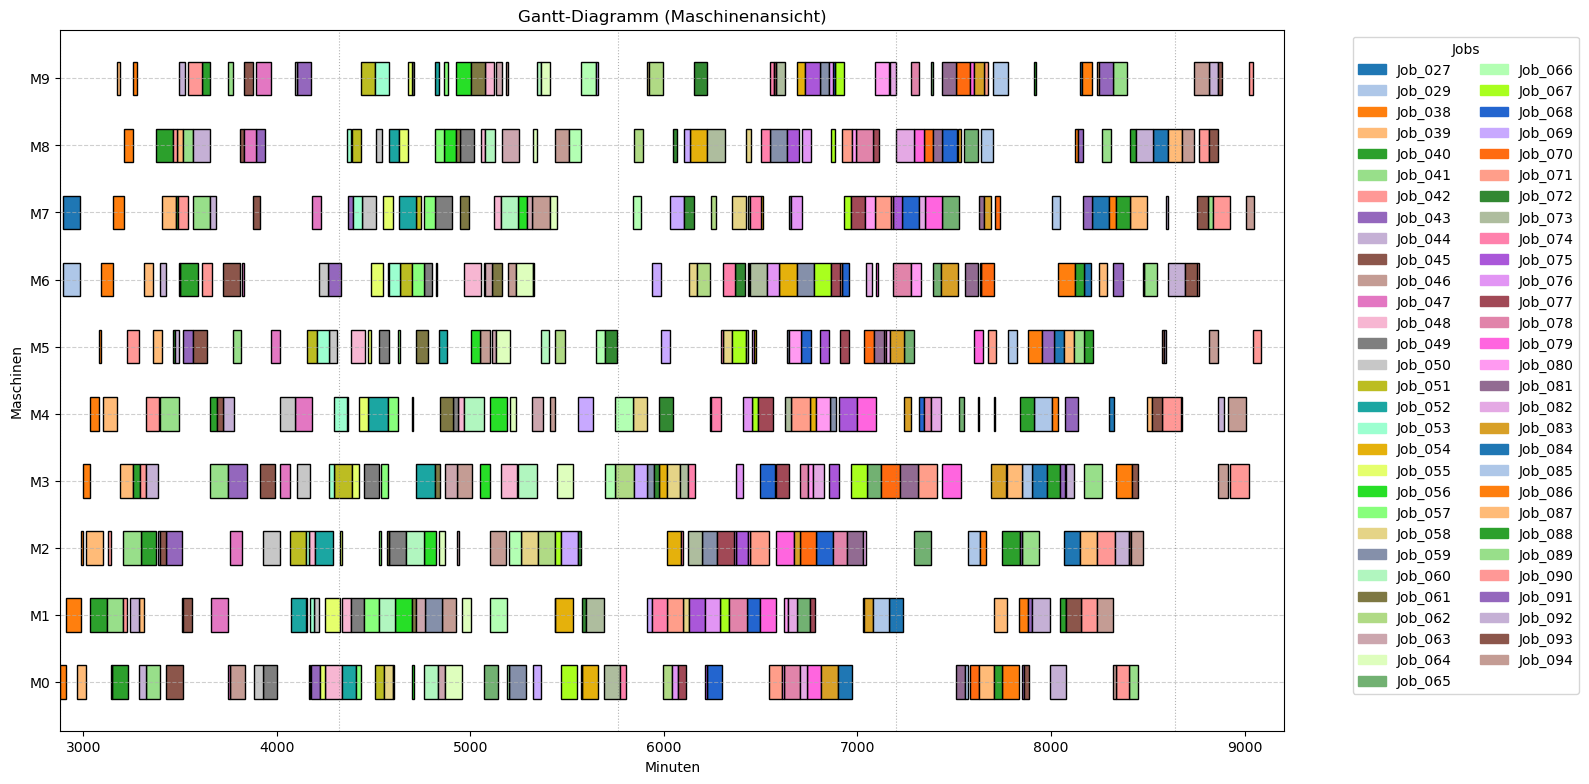

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [51]:
show.plot_gantt_machines(df_reschedule)
check.check_all_constraints(df_reschedule)

### c) Simulation

In [52]:
# Auf einen Tag filtern
filt = (df_reschedule["Start"] >=  day_start) & (df_reschedule["Start"] < day_end)
df_plan_single_day = df_reschedule[filt]
df_plan_single_day

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_027,7,2188.04,M7,2895.11,89.0,796.07,2984.11
1,Job_029,5,2331.94,M6,2895.11,88.0,651.17,2983.11
2,Job_038,0,2880.00,M0,2880.00,29.0,29.00,2909.00
3,Job_038,1,2880.00,M1,2909.00,78.0,107.00,2987.00
4,Job_038,2,2880.00,M2,2987.00,9.0,116.00,2996.00
...,...,...,...,...,...,...,...,...
155,Job_053,3,4077.28,M5,4205.89,61.0,189.61,4266.89
156,Job_053,4,4077.28,M3,4266.89,26.0,215.61,4292.89
157,Job_053,5,4077.28,M4,4292.89,69.0,284.61,4361.89
172,Job_055,0,4204.04,M0,4221.56,29.0,46.52,4250.56


In [53]:
simulation = ProductionDaySimulation(df_plan_single_day, vc=0.35)
df_execution, df_undone = simulation.run(start_time = day_start, end_time=day_end)

[48:00:00] Job_038 started on M0
[48:15:06] Job_027 started on M7
[48:15:06] Job_029 started on M6
[48:22:15] Job_038 finished on M0 (after 22 minutes 15 seconds)
[48:29:00] Job_038 started on M1
[49:28:03] Job_039 started on M0
[49:40:41] Job_027 finished on M7 (after 85 minutes 35 seconds)
[49:41:02] Job_029 finished on M6 (after 85 minutes 56 seconds)
[49:58:37] Job_038 finished on M1 (after 89 minutes 38 seconds)
[49:58:37] Job_038 started on M2
[50:06:30] Job_038 finished on M2 (after 07 minutes 53 seconds)
[50:06:30] Job_038 started on M3
[50:16:38] Job_039 finished on M0 (after 48 minutes 35 seconds)
[50:16:38] Job_039 started on M2
[50:32:46] Job_040 started on M1
[50:40:32] Job_038 finished on M3 (after 34 minutes 02 seconds)
[50:40:32] Job_038 started on M4
[51:40:12] Job_038 finished on M4 (after 59 minutes 40 seconds)
[51:40:12] Job_038 started on M5
[51:54:17] Job_038 finished on M5 (after 14 minutes 05 seconds)
[51:54:17] Job_038 started on M6
[51:55:14] Job_040 finished 

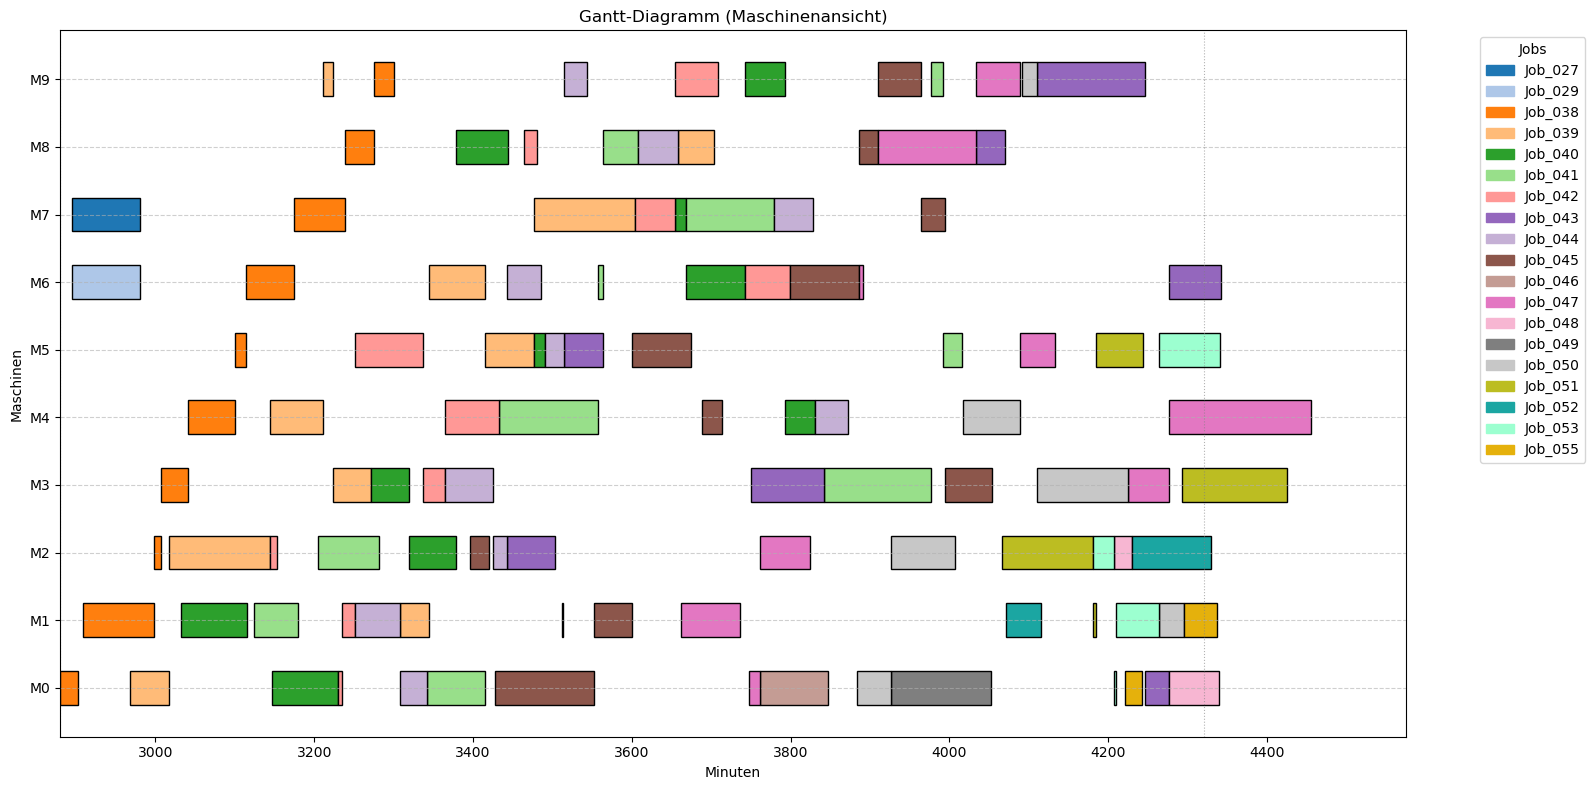

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [54]:
show.plot_gantt_machines(df_execution, duration_column = "Simulated Processing Time")
check.check_all_constraints(df_execution)

In [55]:
df_undone

,Job,Operation,Arrival,Machine,Planned Start,Processing Time
0,Job_047,9,3661.95,M7,4181.56,45.0
1,Job_050,6,3883.56,M6,4219.73,46.0
2,Job_050,7,3883.56,M5,4266.89,46.0
3,Job_053,4,4077.28,M3,4266.89,26.0
4,Job_053,5,4077.28,M4,4292.89,69.0


## IV) Day 3

In [56]:
day_start = day_start + 1440
day_end = day_start + 1440
planning_end = day_start + 3*1440

In [57]:
# Operations aus der Simulation, die nun in den nächsten Tag erst abgeschlossen werden
df_execution_important = get_operations_running_into_day(df_execution, day_start)
df_execution_important 

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
59,Job_043,7,3199.39,M6,4276.92,64.78,1142.31,4341.70
89,Job_047,8,3661.95,M4,4276.80,178.23,793.08,4455.03
91,Job_048,1,3771.94,M0,4276.92,62.26,567.24,4339.18
102,Job_051,3,4065.73,M3,4292.89,131.83,358.99,4424.72
104,Job_052,1,4070.89,M2,4230.25,99.30,258.66,4329.55
108,Job_053,3,4077.28,M5,4263.64,76.71,263.07,4340.35
110,Job_055,1,4204.04,M1,4295.55,41.10,132.61,4336.65


### a) Init_Filter nach Zeitfenster

In [58]:
df_jssp_filtered, df_times_filtered = filter_jobs_by_arrival_window(df_times, df_jssp, day_start, planning_end)
df_jssp_filtered

,Job,Operation,Machine,Processing Time
570,Job_057,0,M0,29
571,Job_057,1,M1,78
572,Job_057,2,M2,9
573,Job_057,3,M3,36
574,Job_057,4,M4,49
...,...,...,...,...
1135,Job_113,5,M9,76
1136,Job_113,6,M5,47
1137,Job_113,7,M3,52
1138,Job_113,8,M4,90


### a2) Operations, die evtl. zu früh abgearbeitet wurden, werden entfernt 
> das ist in dieser Simulation nicht der Fall

In [59]:
df_jssp_todo = get_unexecuted_operations(df_jssp_filtered, df_execution)
df_jssp_todo

,Job,Operation,Machine,Processing Time
0,Job_057,0,M0,29
1,Job_057,1,M1,78
2,Job_057,2,M2,9
3,Job_057,3,M3,36
4,Job_057,4,M4,49
...,...,...,...,...
565,Job_113,5,M9,76
566,Job_113,6,M5,47
567,Job_113,7,M3,52
568,Job_113,8,M4,90


### a2) Operations, die ursprünglich schon gestartet sein sollten, aber es nicht sind, werden hinzugefügt

In [60]:
df_jssp_todo_extended = extend_with_undone_operations(df_jssp_todo, df_undone)
df_jssp_todo_extended

,Job,Operation,Machine,Processing Time
0,Job_047,9,M7,45.0
1,Job_050,6,M6,46.0
2,Job_050,7,M5,46.0
3,Job_053,4,M3,26.0
4,Job_053,5,M4,69.0
...,...,...,...,...
570,Job_113,5,M9,76
571,Job_113,6,M5,47
572,Job_113,7,M3,52
573,Job_113,8,M4,90


In [61]:
# Aufgrund der obigen evtl. Änderungen müssen die Zeiten anhand der final (zu planenden) Operationen neu geladen werden
df_times_filtered = update_times_after_operation_changes(df_times, df_jssp_todo_extended)
df_times_filtered

,Job,Arrival
0,Job_047,3661.95
1,Job_050,3883.56
2,Job_053,4077.28
3,Job_057,4320.00
4,Job_058,4408.05
5,Job_059,4472.78
6,Job_060,4527.97
7,Job_061,4566.61
8,Job_062,4639.39
9,Job_063,4679.74


### b) Rescheduling

In [62]:
df_reschedule = rssv_a.solve_jssp_weighted_individual_flowtime_with_fixed_ops(
    df_jssp_todo_extended, df_times_filtered, df_execution_important, 
    solver_time_limit = solver_limit,
    reschedule_start = day_start
)
df_reschedule

Running HiGHS 1.10.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
Set option time_limit to 7200
Set option solution_file to "/var/folders/88/5n59t5yx3095jhz9lldbm0kr0000gn/T/f17c6a9bfdd64753bc55d160a0e674ca-pulp.sol"
Set option log_file to "/var/folders/88/5n59t5yx3095jhz9lldbm0kr0000gn/T/f17c6a9bfdd64753bc55d160a0e674ca-pulp.HiGHS_log"
Set option write_solution_to_file to true
Number of BV entries in BOUNDS section is 16648
MIP  f17c6a9bfdd64753bc55d160a0e674ca-pulp has 33931 rows; 17283 cols; 100292 nonzeros; 16648 integer variables (16648 binary)
Coefficient ranges:
  Matrix [1e+00, 1e+05]
  Cost   [1e-04, 3e-04]
  Bound  [1e+00, 1e+00]
  RHS    [2e+00, 1e+05]
Presolving model
33697 rows, 17106 cols, 99764 nonzeros  0s
21778 rows, 17106 cols, 64247 nonzeros  0s
21648 rows, 17041 cols, 63987 nonzeros  0s

Solving MIP model with:
   21648 rows
   17041 cols (16466 binary, 0 integer, 0 implied int., 575 continuous)
   63987 nonzeros

Src: B => Branching; C => Centr

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_047,9,3661.95,M7,4455.03,45.0,838.08,4500.03
1,Job_050,6,3883.56,M6,4341.70,46.0,504.14,4387.70
2,Job_050,7,3883.56,M5,4387.70,46.0,550.14,4433.70
3,Job_053,4,4077.28,M3,4424.72,26.0,373.44,4450.72
4,Job_053,5,4077.28,M4,4455.03,69.0,446.75,4524.03
...,...,...,...,...,...,...,...,...
570,Job_113,5,8629.61,M9,10607.78,76.0,2054.17,10683.78
571,Job_113,6,8629.61,M5,10683.78,47.0,2101.17,10730.78
572,Job_113,7,8629.61,M3,10730.78,52.0,2153.17,10782.78
573,Job_113,8,8629.61,M4,10782.78,90.0,2243.17,10872.78


In [63]:
df_reschedule.to_csv("data/04a_schedule_03.csv", index = False)

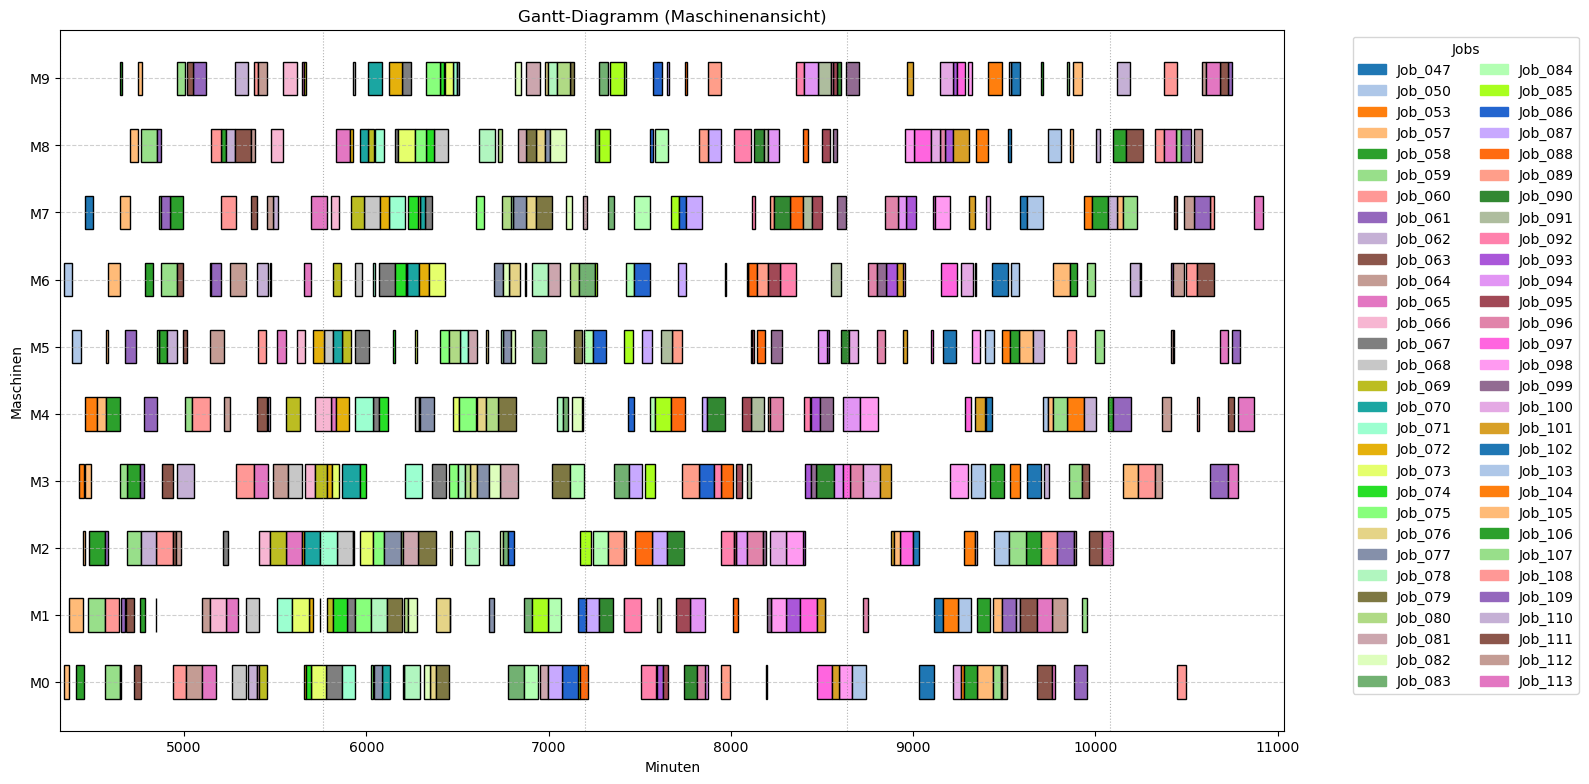

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [64]:
show.plot_gantt_machines(df_reschedule)
check.check_all_constraints(df_reschedule)

### c) Simulation

In [65]:
# Auf einen Tag filtern
filt = (df_reschedule["Start"] >=  day_start) & (df_reschedule["Start"] < day_end)
df_plan_single_day = df_reschedule[filt]
df_plan_single_day

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_047,9,3661.95,M7,4455.03,45.0,838.08,4500.03
1,Job_050,6,3883.56,M6,4341.70,46.0,504.14,4387.70
2,Job_050,7,3883.56,M5,4387.70,46.0,550.14,4433.70
3,Job_053,4,4077.28,M3,4424.72,26.0,373.44,4450.72
4,Job_053,5,4077.28,M4,4455.03,69.0,446.75,4524.03
...,...,...,...,...,...,...,...,...
157,Job_072,2,5517.28,M1,5682.89,22.0,187.61,5704.89
158,Job_072,3,5517.28,M5,5704.89,61.0,248.61,5765.89
165,Job_073,0,5518.72,M1,5591.89,91.0,164.17,5682.89
166,Job_073,1,5518.72,M0,5695.78,85.0,262.06,5780.78


In [66]:
simulation = ProductionDaySimulation(df_plan_single_day, vc=0.35)
df_execution, df_undone = simulation.run(start_time = day_start, end_time=day_end)

[72:19:10] Job_057 started on M0
[72:21:41] Job_050 started on M6
[72:37:31] Job_057 finished on M0 (after 18 minutes 20 seconds)
[72:47:02] Job_050 finished on M6 (after 25 minutes 20 seconds)
[72:48:10] Job_057 started on M1
[73:07:41] Job_050 started on M5
[73:28:03] Job_058 started on M0
[73:44:43] Job_053 started on M3
[73:55:41] Job_050 finished on M5 (after 47 minutes 59 seconds)
[73:58:22] Job_058 finished on M0 (after 30 minutes 20 seconds)
[74:15:01] Job_047 started on M7
[74:23:22] Job_057 finished on M1 (after 95 minutes 11 seconds)
[74:23:22] Job_057 started on M2
[74:26:30] Job_053 finished on M3 (after 41 minutes 47 seconds)
[74:26:30] Job_053 started on M4
[74:32:46] Job_059 started on M1
[74:35:07] Job_057 finished on M2 (after 11 minutes 45 seconds)
[74:35:07] Job_057 started on M3
[74:36:36] Job_058 started on M2
[74:50:26] Job_047 finished on M7 (after 35 minutes 25 seconds)
[75:05:36] Job_057 finished on M3 (after 30 minutes 29 seconds)
[75:17:15] Job_053 finished 

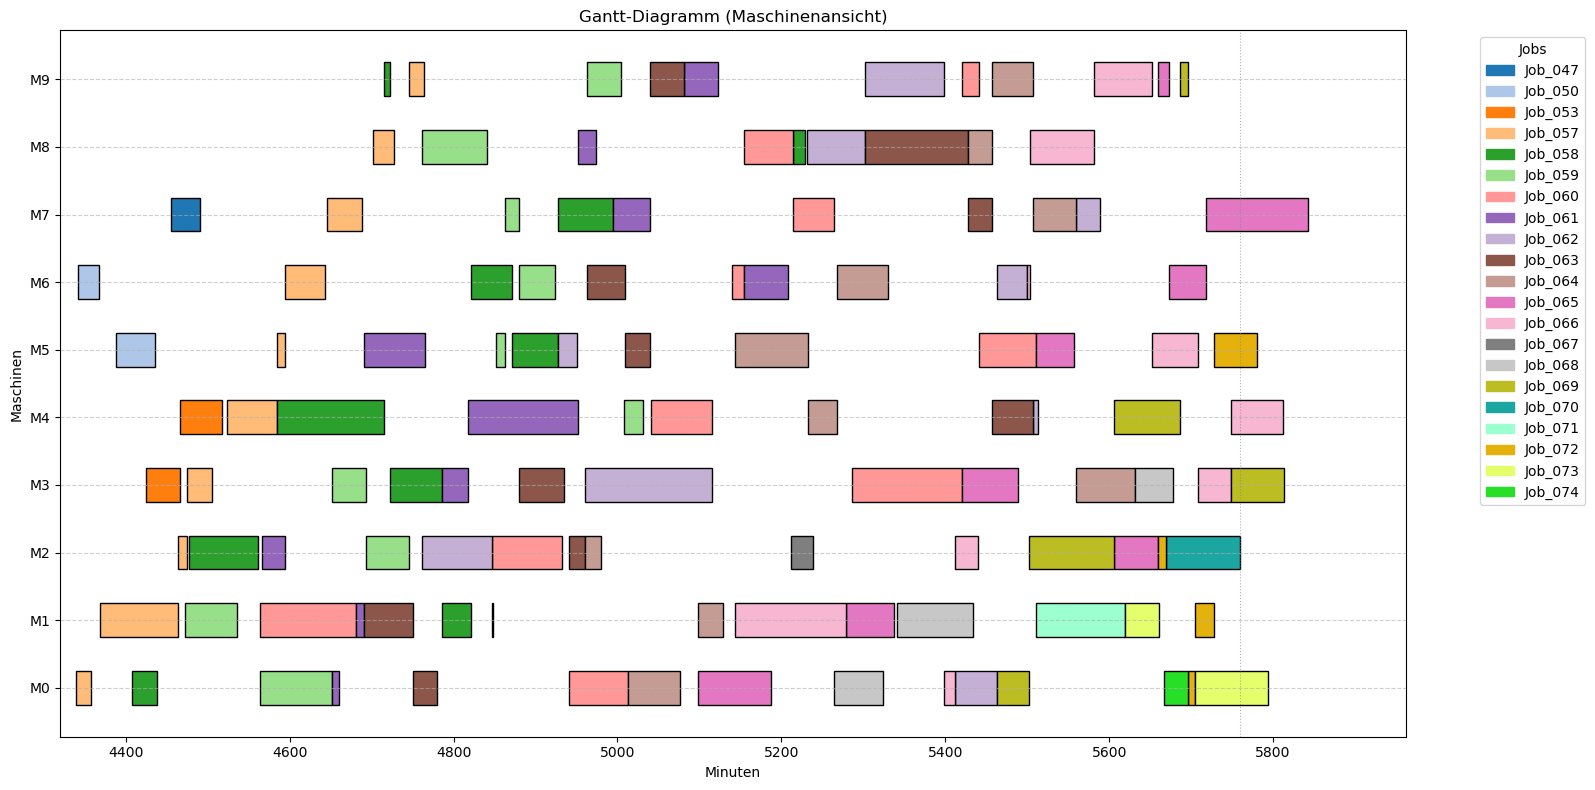

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [67]:
show.plot_gantt_machines(df_execution, duration_column = "Simulated Processing Time")
check.check_all_constraints(df_execution)

In [68]:
df_undone

,Job,Operation,Arrival,Machine,Planned Start,Processing Time
0,Job_070,1,5505.73,M1,5744.78,2.0
1,Job_071,1,5510.89,M2,5744.78,95.0
